In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import re
import seaborn as sb
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [78]:
print("En el presente ejercicio se analizó la siguente base de Tweets:\n")
fileData = pd.read_csv("covid19_tweets_small.csv") 
fileData

En el presente ejercicio se analizó la siguente base de Tweets:



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,26/05/17 5:46,624,950,18775,False,25/07/20 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",16/04/09 20:06,2253,1677,24,True,25/07/20 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,28/02/09 18:57,9275,9525,7254,False,25/07/20 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,07/03/19 1:45,197,987,1488,False,25/07/20 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,12/02/17 6:45,101009,168,101,False,25/07/20 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,ROMEO 🗯️,"Kwa-Thema, South Africa",without commitment you will never start.\nwith...,06/04/18 18:21,1666,2204,201,False,25/07/20 12:24,Let's give it a try #alreadyvideo #COVID19 #Hu...,"['alreadyvideo', 'COVID19', 'HurricaneHanna']",Twitter for Android,False
95,Safiy,NaN,"Detroit life. Creative Beast, Animation, Visua...",18/11/19 16:27,9,33,42,False,25/07/20 12:24,Shout out to Earth. Hands down the worst react...,NaN,Twitter for iPhone,False
96,TNCoronaUpdates,"Chennai, India",Data Analyzer | Stay Connected For All Offici...,09/04/18 16:00,6601,24,22269,False,25/07/20 12:24,#TamilNadu | #COVID19 | 25th July\n\n● TN - ...,"['TamilNadu', 'COVID19']",Twitter for Android,False
97,CraigBrigham MebaneNC #864511320 #GoodTrouble,"Mebane, NC","Fmr Army Security Agency, Meritorious Service....",08/05/19 14:11,77,676,1542,False,25/07/20 12:24,@WLOS_13 @wcti12 @thecw22 @myrdc @ABC45TV Plea...,NaN,Twitter for Android,False


In [79]:
print("Nuestro análisis se centro en diversos factores como el origen (tipo de dispositivo), tipo de cuenta, análisis de los usuarios y palabras clave de la conversación")
print("\nRespecto al origen detectamos las siguentes categorias únicas:\n")

fileData['source'].unique().tolist()

Nuestro análisis se centro en diversos factores como el origen (tipo de dispositivo), tipo de cuenta, análisis de los usuarios y palabras clave de la conversación

Respecto al origen detectamos las siguentes categorias únicas:



['Twitter for iPhone',
 'Twitter for Android',
 'Twitter Web App',
 'Buffer',
 'TweetDeck',
 'Twitter for iPad',
 'Africa Newsroom',
 'Blood Donors India',
 'TweetCaster for Android',
 'Alexander Higgins',
 'IFTTT',
 'Hootsuite Inc.']

In [80]:
print("Las categorias únicas se agruparon por el número de concurrencias de manera descendente llegando al siguente resultado:")
duplication = fileData.pivot_table(index=['source'], aggfunc='size')
duplication.sort_values(ascending=False)

Las categorias únicas se agruparon por el número de concurrencias de manera descendente llegando al siguente resultado:


source
Twitter Web App            29
Twitter for Android        27
Twitter for iPhone         20
TweetCaster for Android     7
TweetDeck                   6
Twitter for iPad            3
Hootsuite Inc.              2
IFTTT                       1
Buffer                      1
Blood Donors India          1
Alexander Higgins           1
Africa Newsroom             1
dtype: int64

Para facilitar el análisis se decidió graficar las categorías principales consolidando las categorías secundarias en otros. Obteniendo los siguentes resultados: 



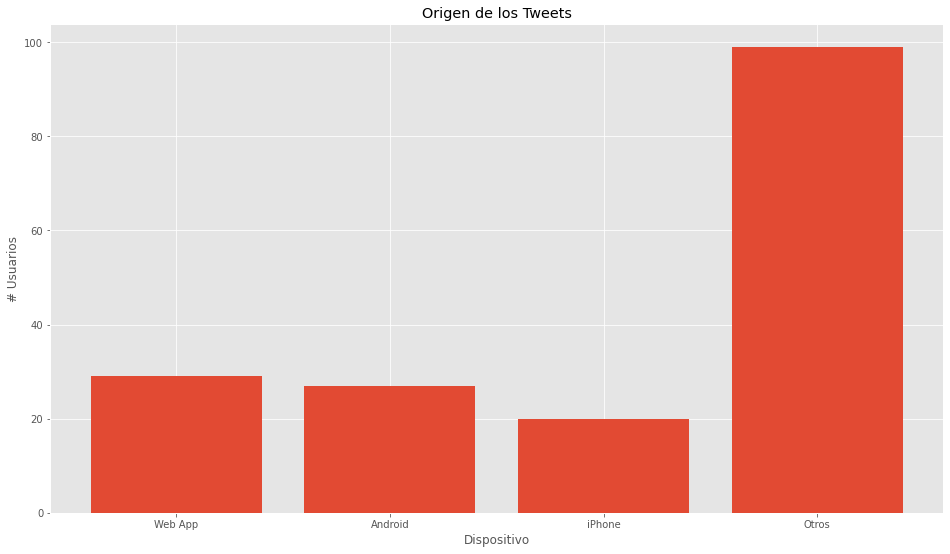

In [81]:
print("Para facilitar el análisis se decidió graficar las categorías principales consolidando las categorías secundarias en otros. Obteniendo los siguentes resultados: \n")
others = 0
for i in range(len(duplication)):
    if(duplication[i] == 22974 or duplication[i] == 16758 or duplication[i] == 15824):
        continue
    others += duplication[i]
    
sourceX = ["Web App", "Android", "iPhone", "Otros"]

sourceY = []
sourceY.append(duplication["Twitter Web App"])
sourceY.append(duplication["Twitter for Android"])
sourceY.append(duplication["Twitter for iPhone"])
sourceY.append(others)

plt.bar(sourceX, sourceY)
plt.title("Origen de los Tweets")
plt.xlabel("Dispositivo")
plt.ylabel("# Usuarios")
plt.show()

Para conocer e identificar la ubicación de los tweets se realizó un ejerció similar a las agrupaciones de las categorías. Obteniendo el siguiente resultado:

New Delhi, India                  3
India                             2
astroworld                        2
Chennai, India                    2
San Francisco                     2
Washington, DC                    1
👇🏻location at link below👇🏻        1
Australia                         1
Bethesda, Maryland                1
Northwest Indiana                 1
Scotland                          1
Mebane, NC                        1
100+ countries                    1
Cavan, Ireland                    1
no e-pass to cross borders...     1
Gainesville, FL                   1
Marietta, GA                      1
Port Elizabeth, South Africa      1
United States                     1
Cholderton, Wiltshire, SP4 0DR    1
Name: user_location, dtype: int64




/Users/danielchocho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/danielchocho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/danielchocho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/danielchocho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0, flags=flags)


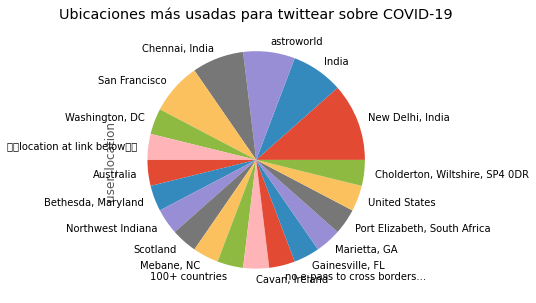

In [82]:
print("Para conocer e identificar la ubicación de los tweets se realizó un ejerció similar a las agrupaciones de las categorías. Obteniendo el siguiente resultado:\n")
dataFrame = pd.DataFrame(fileData)
tweets = dataFrame['user_location'].value_counts()
print(tweets[0:20])
print("\n")
fig, ax = plt.subplots(figsize = (10,5))
tweets[0:20].plot(kind='pie',title="Ubicaciones más usadas para twittear sobre COVID-19")

De las variables que integran cada objeto se seleccionaron las variables de carácter numérico. Dando como resultado la selección de el número de seguidores, likes y amigos. Con esto se busca agrupar las cuentas en categorías similares:



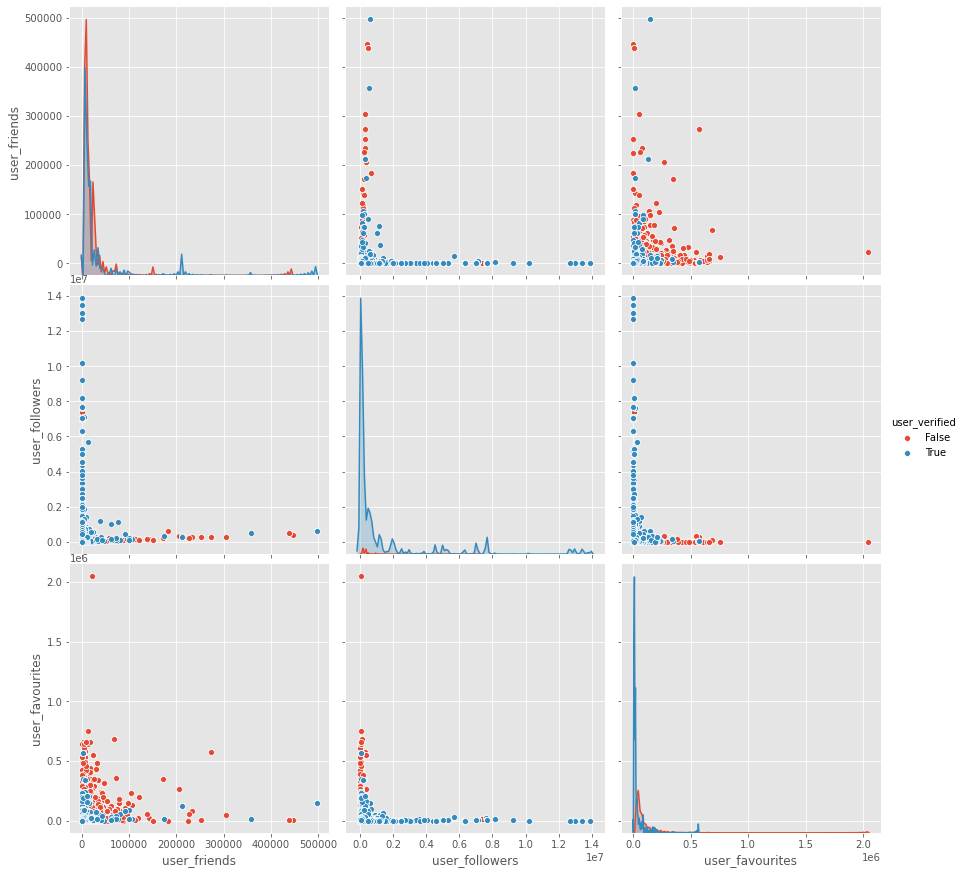

In [62]:
print("De las variables que integran cada objeto se seleccionaron las variables de carácter numérico. Dando como resultado la selección de el número de seguidores, likes y amigos. Con esto se busca agrupar las cuentas en categorías similares:\n")
sb.pairplot(dataFrame.dropna(), hue='user_verified',height=4,vars=["user_friends","user_followers","user_favourites"],kind='scatter')

Para visualizar los datos en dos categorías se dividirán si la cuenta es verificada o no



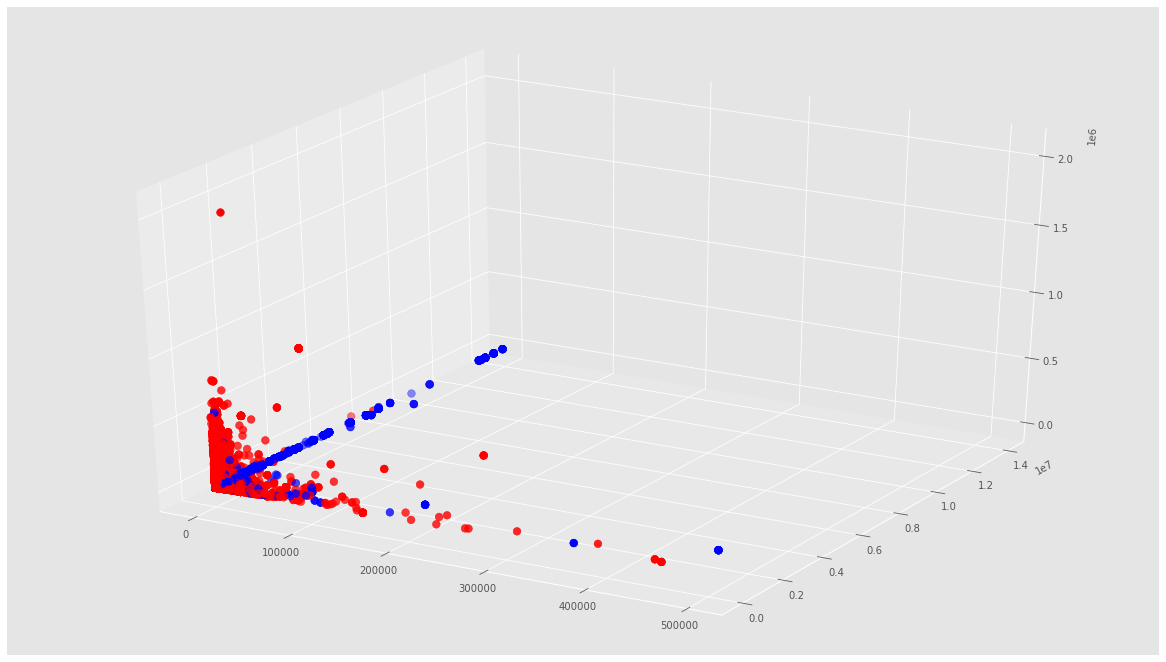

In [64]:
print("Para visualizar los datos en dos categorías se dividirán si la cuenta es verificada o no\n")
X = np.array(dataFrame[["user_friends","user_followers","user_favourites"]])
#y = np.array(dataframe['year'].unique())
y = np.array(dataFrame['user_verified'])

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red']
asignar=[]

for row in y:
    if row == True:
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

Se determino el valor de k utilizando la función del K-Means donde graficamos algo llamado clusters donde“[compara los] resultados [de] la distancia media entre los puntos de datos y su centroid; como el valor de la media disminuirá a medida que aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y encontrar el punto codo, donde la tasa de descenso se afila". (Na9, 2018) En este caso la curva se aplana cuando el valor es 5.



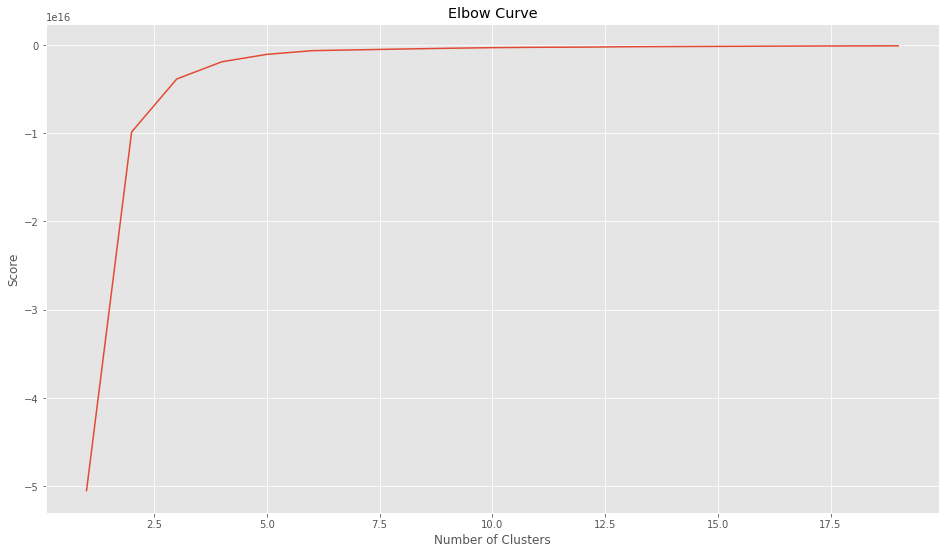

In [88]:
print('Se determino el valor de k utilizando la función del K-Means donde graficamos algo llamado clusters donde“[compara los] resultados [de] la distancia media entre los puntos de datos y su centroid; como el valor de la media disminuirá a medida que aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y encontrar el punto codo, donde la tasa de descenso se afila". (Na9, 2018) En este caso la curva se aplana cuando el valor es 5.\n')
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [91]:
print("Con el algoritmo de K-Means obtenemos los centros en los cuales se agruparán las 5 categorías propuestas para las cuentas\n")
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

Con el algoritmo de K-Means obtenemos los centros en los cuales se agruparán las 5 categorías propuestas para las cuentas

[[1.25520724e+03 1.49737634e+06 4.73517978e+03]
 [2.18009121e+03 1.62123806e+04 1.55466387e+04]
 [9.89986441e+02 7.23356640e+06 2.55654915e+03]
 [2.19937888e+02 1.30086912e+07 8.03913043e+01]
 [4.74606383e+02 4.52857518e+06 2.90532270e+03]]


En esta grafica predecimos de manera visual como se dividirán los datos en las 5 categorías antes mencionadas



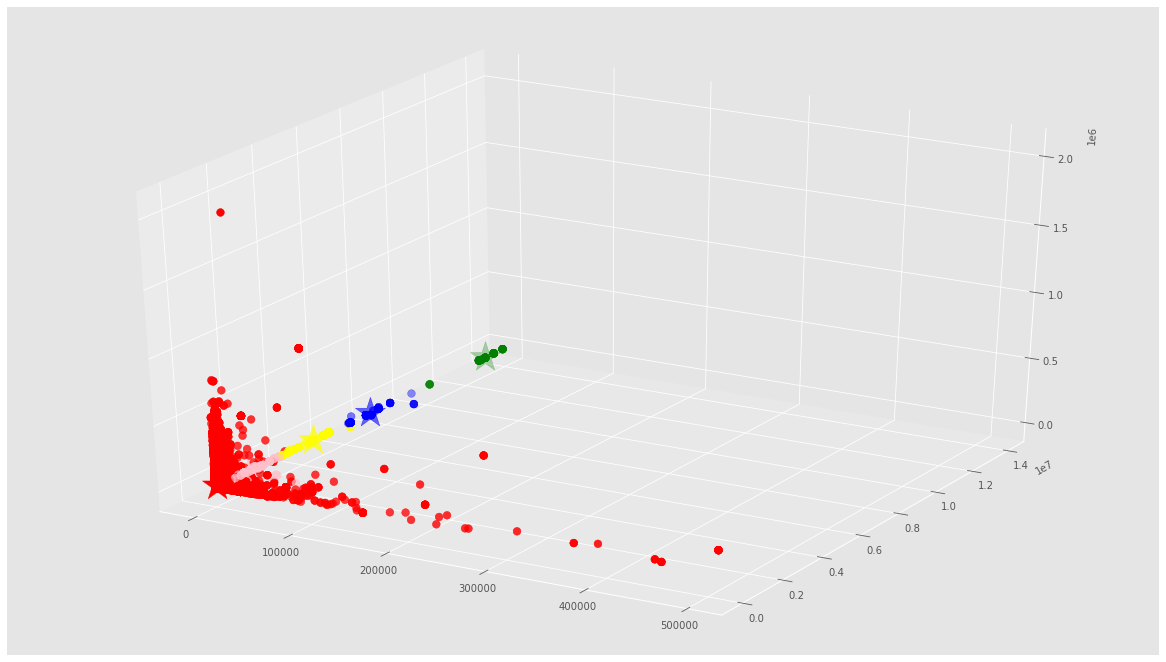

In [69]:
print("En esta grafica predecimos de manera visual como se dividirán los datos en las 5 categorías antes mencionadas\n")
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','yellow','pink']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

En las siguientes 3 graficas visualizamos en 2D cada uno de los pares de variables:



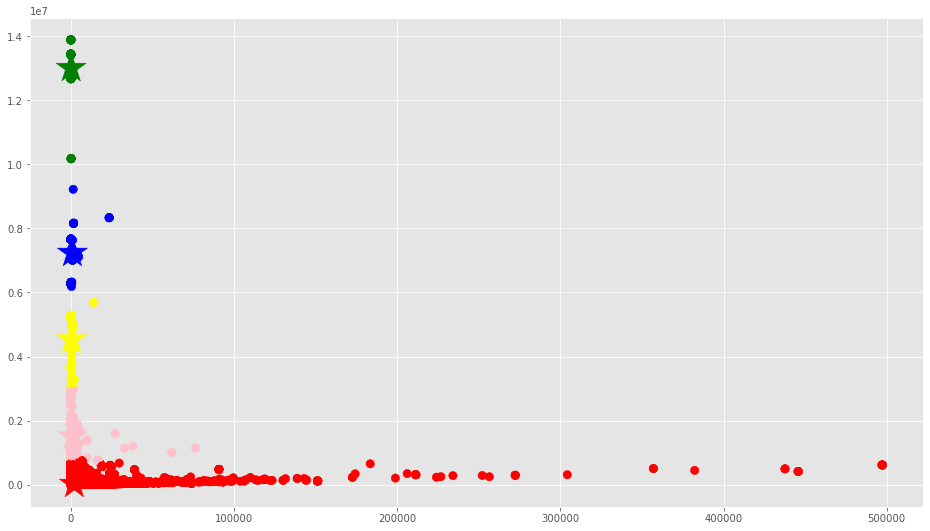

In [68]:
print("En las siguientes 3 graficas visualizamos en 2D cada uno de los pares de variables:\n")
f1 = dataFrame['user_friends'].values
f2 = dataFrame['user_followers'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

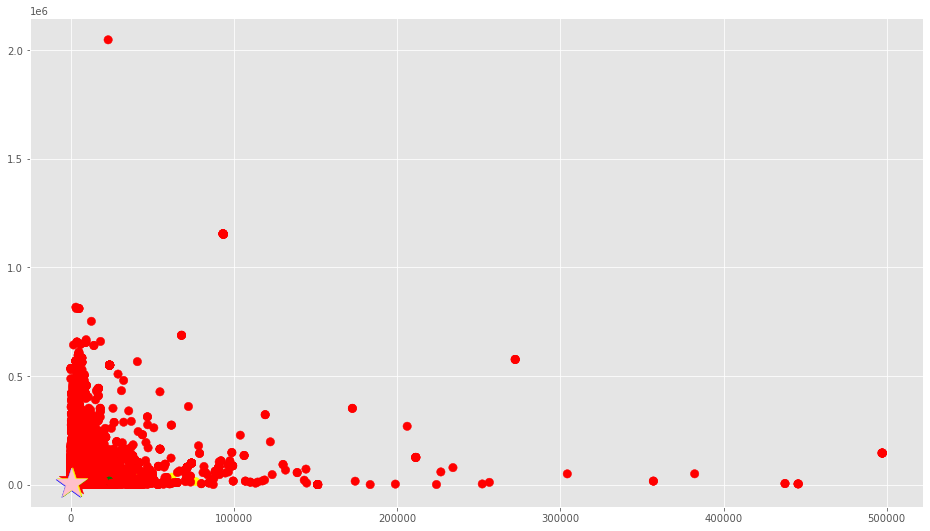

In [56]:
f1 = dataFrame['user_friends'].values
f2 = dataFrame['user_favourites'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

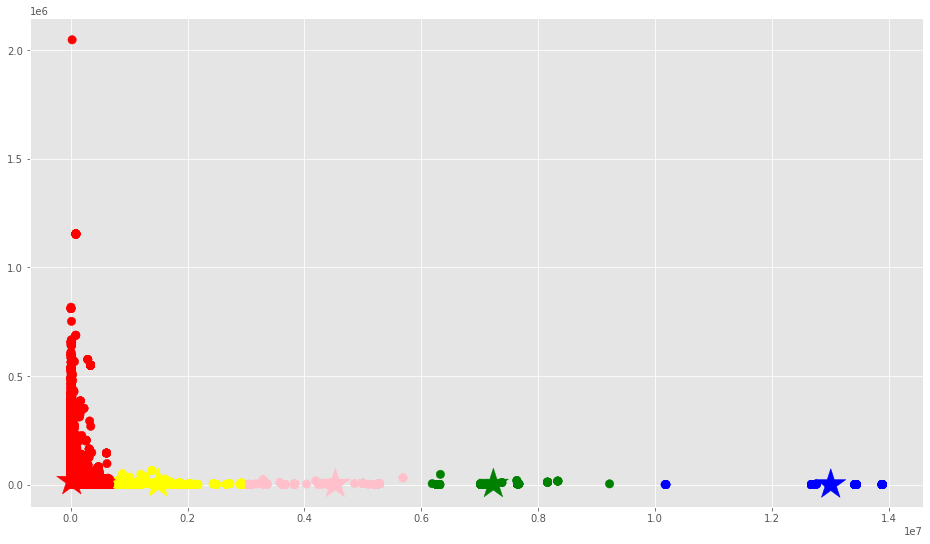

In [57]:
f1 = dataFrame['user_followers'].values
f2 = dataFrame['user_favourites'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [71]:
print("Finalmente se presenta el desglose de las categorías mencionadas anteriormente: \n")
copy =  pd.DataFrame()
copy['date']=dataFrame['date'].values
copy['user_verified']=dataFrame['user_verified'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

Finalmente se presenta el desglose de las categorías mencionadas anteriormente: 



,color,cantidad
0,red,72897
1,green,161
2,blue,295
3,yellow,282
4,pink,801


In [72]:
print("Para ejemplificar la distribución, la agrupación (rojo) tiene la siguiente cantidad de cuentas verificadas y no verificadas:\n")
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['user_verified']=[False, True]
diversidadGrupo['cantidad']=group_referrals.groupby('user_verified').size()
diversidadGrupo

Para ejemplificar la distribución, la agrupación (rojo) tiene la siguiente cantidad de cuentas verificadas y no verificadas:



,user_verified,cantidad
0,False,65069
1,True,7828


Por último para identificar el sentido de la conversación en Twitter se realizó un análisis del texto en donde se obtuvieron las palabras clave de los tweets y se agruparon en una nube de palabras.



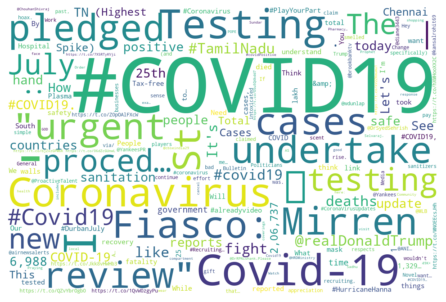

In [74]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def clean_text(text):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    cleantext = deEmojify(cleantext)
    return cleantext

def my_tokenizer(text):
    return text.split() if text != None else []

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    
def showWorldCloud(fileData):
    dataFrame = pd.DataFrame(fileData)
    dataFrame["clean_text"] = ''
    for i, row in dataFrame.iterrows():
        dataFrame.at[i, "clean_text"] = clean_text(row['text'])

    tokens = dataFrame.clean_text.map(my_tokenizer).sum()
    counter = Counter(tokens)
    counter = Counter(remove_stopwords(tokens))
    wordcloud(counter)

print("Por último para identificar el sentido de la conversación en Twitter se realizó un análisis del texto en donde se obtuvieron las palabras clave de los tweets y se agruparon en una nube de palabras.\n")
showWorldCloud(fileData)

In [89]:
print("Na8. (2018). K-Means en Python paso a paso. Recuperado el  28 de octubre del 2020, de https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso")

Na8. (2018). K-Means en Python paso a paso. Recuperado el  28 de octubre del 2020, de https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso
